This notebook reproduces Figure S4 in "Integrating human biophysics and data-driven analysis to assess humidity’s role in heatstroke prediction" by Kong et al.

In [1]:
"""
import python packages
please install required packages before running this notebook
"""
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# read in mean absolute prediction error for existing heat stress indices
HSI_mae_prefecture=xr.open_dataset('../data/HSI_MAE.nc').MAE
# scale from daily to summer (122 days during June-Sep) total in 10^3
HSI_mae_prefecture=HSI_mae_prefecture*122/1000
# calculate Japan country-average MAE for existing heat stress indices
HSI_mae_country=HSI_mae_prefecture.mean('pf')
# concat prefectural- and country-level MAE
mae=xr.concat([HSI_mae_prefecture,HSI_mae_country.assign_coords(pf=48).expand_dims(dim='pf')],dim='pf')

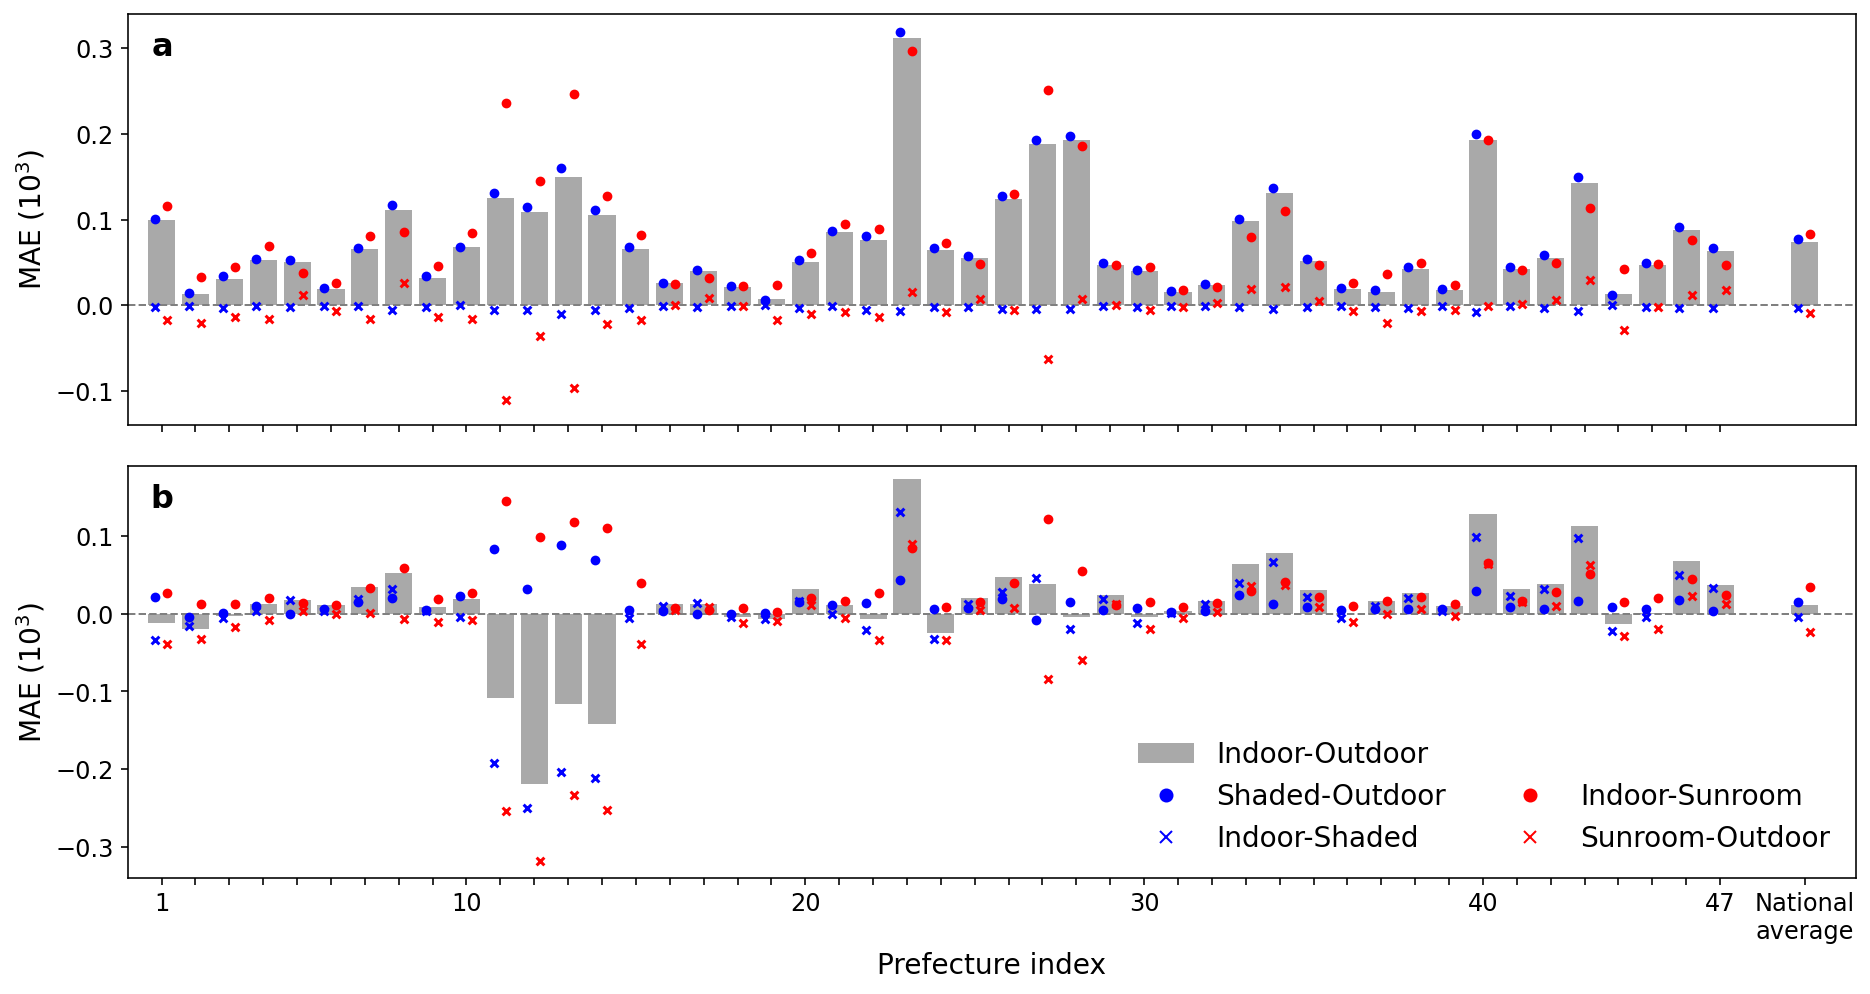

In [3]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)  
ax2 = fig.add_subplot(2,1,2)  

# X variable as prefecture index, the rightmost index (49.5) corresponds to national average 
x=np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,49.5]) 

width=0.8
size=15
# WBGTindoor-WBGToutdoor
ax1.bar(x,mae.sel(HSI='WBGTin')-mae.sel(HSI='WBGT'),width=width,facecolor='darkgray') 
# WBGTshaded-WBGToutdoor
ax1.scatter(x-width/4, mae.sel(HSI='WBGT_shaded')-mae.sel(HSI='WBGT'),marker='o',s=size,c='b',zorder=5) #
# WBGTindoor-WBGTshaded
ax1.scatter(x-width/4, mae.sel(HSI='WBGTin')-mae.sel(HSI='WBGT_shaded'), marker='x',s=size,c='b',zorder=5)
# WBGTindoor-WBGTSunroom
ax1.scatter(x+width/5, mae.sel(HSI='WBGTin')-mae.sel(HSI='WBGT_Sunroom'),marker='o',s=size,c='r',zorder=5)
# WBGTSunroom-WBGToutdoor
ax1.scatter(x+width/5, mae.sel(HSI='WBGT_Sunroom')-mae.sel(HSI='WBGT'), marker='x',s=size,c='r',zorder=5)

ax1.axhline(y=0, color='grey', linestyle='--', linewidth=1)

ax1.tick_params(axis='both', labelsize=12)
ax1.set_xlim(0,51)
ax1.set_xlabel('',fontsize=14)
ax1.set_ylabel('MAE '+ '('+r'$\mathrm{10}^{\mathrm{3}}$'+')',fontsize=14)
ax1.set_xticks(np.arange(1,48))
ax1.set_xticklabels([])

width=0.8
# UTCIindoor-UTCIoutdoor
ax2.bar(x,mae.sel(HSI='UTCIin')-mae.sel(HSI='UTCI'),width=width,facecolor='darkgray',label='Indoor-Outdoor')
# UTCIshaded-UTCIoutdoor
ax2.scatter(x-width/4, mae.sel(HSI='UTCI_shaded')-mae.sel(HSI='UTCI'),marker='o',s=size,c='b',zorder=5,label='Shaded-Outdoor')
# UTCIindoor-UTCIshaded
ax2.scatter(x-width/4, mae.sel(HSI='UTCIin')-mae.sel(HSI='UTCI_shaded'), marker='x',s=size,c='b',zorder=5,label='Indoor-Shaded')
# UTCIindoor-UTCISunroom
ax2.scatter(x+width/5, mae.sel(HSI='UTCIin')-mae.sel(HSI='UTCI_Sunroom'),marker='o',s=size,c='r',zorder=5,label='Indoor-Sunroom')
# UTCISunroom-UTCIoutdoor
ax2.scatter(x+width/5, mae.sel(HSI='UTCI_Sunroom')-mae.sel(HSI='UTCI'), marker='x',s=size,c='r',zorder=5,label='Sunroom-outdoor')

ax2.axhline(y=0, color='grey', linestyle='--', linewidth=1)

ax2.tick_params(axis='both', labelsize=12)
ax2.set_xlim(0,51)
ax2.set_xlabel('Prefecture index',fontsize=14)
ax2.set_ylabel('MAE '+ '('+r'$\mathrm{10}^{\mathrm{3}}$'+')',fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels([str(i) if i in [1, 10, 20, 30, 40,47] else '' for i in range(1, 48)]+['National\naverage'])


bar_handle = Patch(facecolor='darkgray', edgecolor='none', label='Indoor-Outdoor')

scatter1 = Line2D([0], [0], marker='o', color='blue', linestyle='None', label='Shaded-Outdoor')
scatter2 = Line2D([0], [0], marker='x', color='blue', linestyle='None', label='Indoor-Shaded')
scatter3 = Line2D([0], [0], marker='x', color='red', linestyle='None', label='Sunroom-Outdoor')
scatter4 = Line2D([0], [0], marker='o', color='red',linestyle='None', label='Indoor-Sunroom')

# Arrange manually: first row has bar + empty placeholder
handles = [
    bar_handle, 
    scatter1,
    scatter2,
    Patch(facecolor='none', edgecolor='none', label=''), 
    scatter4,
    scatter3
]
labels = [h.get_label() for h in handles]

# Create legend with 2 columns
ax2.legend(handles, labels,ncol=2, loc='lower right', frameon=False,fontsize=14)

anno_opts = dict(xy=(0.02, 0.9), xycoords='axes fraction',va='baseline', ha='center')
ax1.annotate('a', **anno_opts,fontsize=16,fontweight='bold')  
ax2.annotate('b', **anno_opts,fontsize=16,fontweight='bold')  

fig.subplots_adjust(bottom=0, left=0,right=1, top=1,hspace=0.1)

ax1.set_ylim(-0.14,0.34)
ax1.set_yticks([-0.1,0,0.1,0.2,0.3])

ax2.set_ylim(-0.34,0.19)
ax2.set_yticks([-0.3,-0.2,-0.1,0,0.1])

**Fig. S4.** Decompose differences in summer cumulative MAE between indoor and outdoor formulations (gray bars) into contributions from removing solar radiation (dots) and fixing wind speed at 1 m/s (crosses) for (a) WBGT and (b) UTCI at each prefecture. Starting from the outdoor formulation, blue markers first remove solar radiation while retaining outdoor wind (Shaded-Outdoor), then fix wind speed (Indoor-Shaded). Red markers reverse the order: first fix wind speed while retaining solar radiation (Sunroom-Outdoor), then remove solar radiation (Indoor-Sunroom). The rightmost column represents the national average.